In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,41107,None,None,85798.491514
2020-06-13,41108,None,None,79712.721978
2020-06-14,41109,None,None,74067.146186
2020-06-15,41110,None,None,68749.426162
2020-06-16,41111,None,None,64014.481238
...,...,...,...,...
2021-03-20,41388,None,None,76614.264701
2021-03-21,41389,None,None,75539.541049
2021-03-22,41390,None,None,74581.339561


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-24_2021-03-24-18-10.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-23_2021-03-23-12-26.pickle


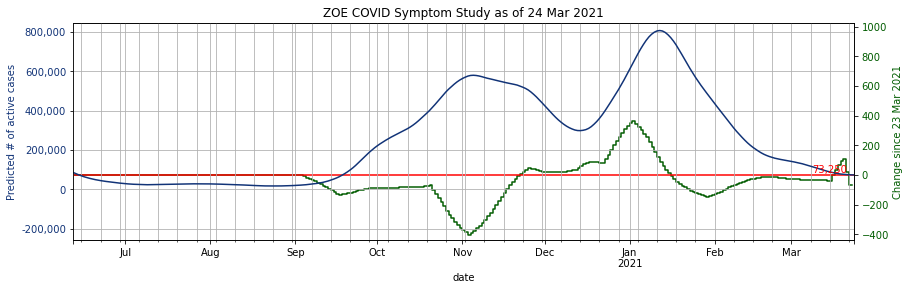

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

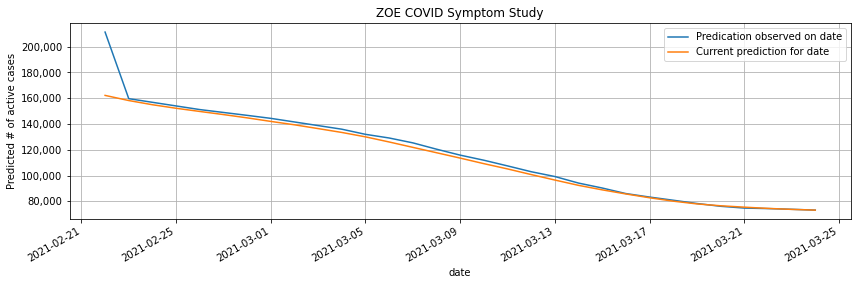

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-24_2021-03-24-18-10.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
15,"Kingston upon Hull, City of",E06000010,1.322941
325,Glasgow City,S12000046,0.697396
333,Flintshire,W06000005,0.605703
47,Northumberland,E06000057,0.565359
206,Ashfield,E07000170,0.539778
306,Midlothian,S12000019,0.530739
207,Broxtowe,E07000172,0.435591
370,Redbridge,E09000026,0.427023
373,North Ayrshire,S12000021,0.418984
174,Preston,E07000123,0.405881
